In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import warnings 
warnings.filterwarnings('ignore')

In [79]:
df=pd.read_csv('Train.csv')

In [80]:
df.head()

,Gender,Height (cm),Weight (kg),Blood Pressure (s/d),Cholesterol Level (mg/dL),BMI,Blood Glucose Level (mg/dL),Bone Density (g/cm²),Vision Sharpness,Hearing Ability (dB),...,Family History,Cognitive Function,Mental Health Status,Sleep Patterns,Stress Levels,Pollution Exposure,Sun Exposure,Education Level,Income Level,Age (years)
0,Male,171.148359,86.185197,151/109,259.465814,29.423017,157.652848,0.132868,0.200000,58.786198,...,NaN,44.059172,Good,Insomnia,2.797064,5.142344,7.108975,NaN,Medium,89
1,Male,172.946206,79.641937,134/112,263.630292,26.626847,118.507805,0.629534,0.267312,54.635270,...,Heart Disease,45.312298,Good,Normal,9.339930,7.272720,3.918489,Undergraduate,Medium,77
2,Female,155.945488,49.167058,160/101,207.846206,20.217553,143.587550,0.473487,0.248667,54.564632,...,Hypertension,56.246991,Poor,Insomnia,9.234637,8.500386,5.393408,NaN,Medium,70
3,Female,169.078298,56.017921,133/94,253.283779,19.595270,137.448581,1.184315,0.513818,79.722963,...,Hypertension,55.196092,Poor,Insomnia,4.693446,7.555511,2.745578,NaN,Low,52
4,Female,163.758355,73.966304,170/106,236.119899,27.582078,145.328695,0.434562,0.306864,52.479469,...,NaN,53.023379,Good,Normal,4.038537,9.429097,3.878435,Undergraduate,High,79


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Gender                       3000 non-null   object 
 1   Height (cm)                  3000 non-null   float64
 2   Weight (kg)                  3000 non-null   float64
 3   Blood Pressure (s/d)         3000 non-null   object 
 4   Cholesterol Level (mg/dL)    3000 non-null   float64
 5   BMI                          3000 non-null   float64
 6   Blood Glucose Level (mg/dL)  3000 non-null   float64
 7   Bone Density (g/cm²)         3000 non-null   float64
 8   Vision Sharpness             3000 non-null   float64
 9   Hearing Ability (dB)         3000 non-null   float64
 10  Physical Activity Level      3000 non-null   object 
 11  Smoking Status               3000 non-null   object 
 12  Alcohol Consumption          1799 non-null   object 
 13  Diet              

In [82]:
df.isnull().sum()

Gender                            0
Height (cm)                       0
Weight (kg)                       0
Blood Pressure (s/d)              0
Cholesterol Level (mg/dL)         0
BMI                               0
Blood Glucose Level (mg/dL)       0
Bone Density (g/cm²)              0
Vision Sharpness                  0
Hearing Ability (dB)              0
Physical Activity Level           0
Smoking Status                    0
Alcohol Consumption            1201
Diet                              0
Chronic Diseases               1299
Medication Use                 1198
Family History                 1451
Cognitive Function                0
Mental Health Status              0
Sleep Patterns                    0
Stress Levels                     0
Pollution Exposure                0
Sun Exposure                      0
Education Level                 627
Income Level                      0
Age (years)                       0
dtype: int64

In [83]:
cat_col=[col for col in df.columns if df[col].dtype=='object']
num_col=[col for col in df.columns if df[col].dtype!='object']

In [84]:
df[cat_col]

,Gender,Blood Pressure (s/d),Physical Activity Level,Smoking Status,Alcohol Consumption,Diet,Chronic Diseases,Medication Use,Family History,Mental Health Status,Sleep Patterns,Education Level,Income Level
0,Male,151/109,Moderate,Former,NaN,Low-carb,NaN,NaN,NaN,Good,Insomnia,NaN,Medium
1,Male,134/112,Low,Current,Occasional,Balanced,Hypertension,NaN,Heart Disease,Good,Normal,Undergraduate,Medium
2,Female,160/101,Moderate,Never,NaN,Balanced,Hypertension,Regular,Hypertension,Poor,Insomnia,NaN,Medium
3,Female,133/94,Moderate,Never,NaN,Balanced,Diabetes,Occasional,Hypertension,Poor,Insomnia,NaN,Low
4,Female,170/106,Low,Former,Frequent,Vegetarian,NaN,NaN,NaN,Good,Normal,Undergraduate,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,Male,134/91,Moderate,Never,NaN,High-fat,Hypertension,Regular,Diabetes,Fair,Normal,Undergraduate,High
2996,Male,110/78,Low,Never,Occasional,High-fat,Diabetes,Occasional,Heart Disease,Good,Normal,Undergraduate,Medium
2997,Male,159/116,Moderate,Current,NaN,Low-carb,NaN,NaN,NaN,Fair,Normal,Undergraduate,Low
2998,Female,134/82,Moderate,Former,Frequent,Balanced,Diabetes,Regular,Hypertension,Good,Insomnia,NaN,High


In [85]:
df['Blood Pressure (s/d)'].unique()

array(['151/109', '134/112', '160/101', ..., '144/98', '110/78', '167/91'],
      dtype=object)

In [86]:
df[num_col]

,Height (cm),Weight (kg),Cholesterol Level (mg/dL),BMI,Blood Glucose Level (mg/dL),Bone Density (g/cm²),Vision Sharpness,Hearing Ability (dB),Cognitive Function,Stress Levels,Pollution Exposure,Sun Exposure,Age (years)
0,171.148359,86.185197,259.465814,29.423017,157.652848,0.132868,0.200000,58.786198,44.059172,2.797064,5.142344,7.108975,89
1,172.946206,79.641937,263.630292,26.626847,118.507805,0.629534,0.267312,54.635270,45.312298,9.339930,7.272720,3.918489,77
2,155.945488,49.167058,207.846206,20.217553,143.587550,0.473487,0.248667,54.564632,56.246991,9.234637,8.500386,5.393408,70
3,169.078298,56.017921,253.283779,19.595270,137.448581,1.184315,0.513818,79.722963,55.196092,4.693446,7.555511,2.745578,52
4,163.758355,73.966304,236.119899,27.582078,145.328695,0.434562,0.306864,52.479469,53.023379,4.038537,9.429097,3.878435,79
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,161.632502,88.323405,204.175510,33.807917,112.075747,1.583006,0.665907,27.997736,57.820282,8.091897,9.846088,9.111205,22
2996,163.443512,93.217007,197.384424,34.894725,101.177692,1.785129,0.720304,32.866623,68.783715,2.427081,1.141303,8.578184,19
2997,177.857644,86.258847,238.641542,27.268332,110.548146,0.366012,0.200000,39.756270,50.133807,7.671837,5.101134,2.199199,85
2998,162.287164,41.371018,198.244328,15.708252,123.704379,1.452963,0.648158,43.338594,68.864629,7.920076,4.452130,5.051613,30


<Axes: >

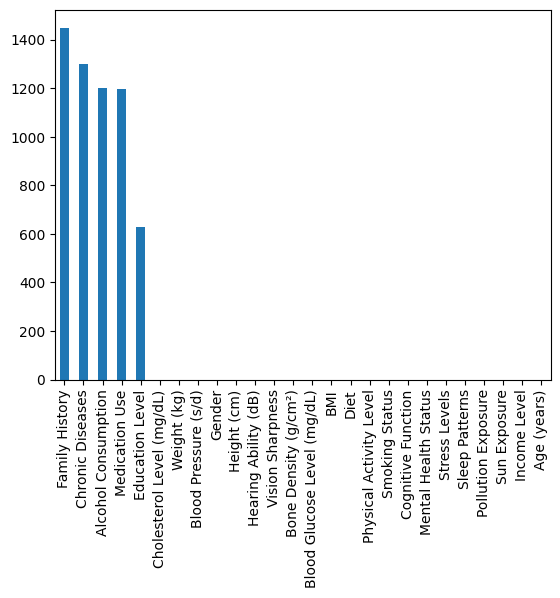

In [87]:
df.isnull().sum().sort_values(ascending=False).plot(kind='bar')

In [88]:
for cols in cat_col :
    df[cols].fillna(df[cols].mode()[0],inplace=True)

In [89]:
df[cat_col].isna().sum()

Gender                     0
Blood Pressure (s/d)       0
Physical Activity Level    0
Smoking Status             0
Alcohol Consumption        0
Diet                       0
Chronic Diseases           0
Medication Use             0
Family History             0
Mental Health Status       0
Sleep Patterns             0
Education Level            0
Income Level               0
dtype: int64

In [90]:
df[cat_col].head(2)

,Gender,Blood Pressure (s/d),Physical Activity Level,Smoking Status,Alcohol Consumption,Diet,Chronic Diseases,Medication Use,Family History,Mental Health Status,Sleep Patterns,Education Level,Income Level
0,Male,151/109,Moderate,Former,Occasional,Low-carb,Hypertension,Regular,Diabetes,Good,Insomnia,Undergraduate,Medium
1,Male,134/112,Low,Current,Occasional,Balanced,Hypertension,Regular,Heart Disease,Good,Normal,Undergraduate,Medium


In [91]:
gender_map={'Male':0,'Female':1}

df['Gender']=df['Gender'].map(gender_map)

In [92]:
df['Gender'].dtype

dtype('int64')

In [93]:
df['Physical Activity Level'].unique()
moderate_activity_Level={'Moderate':0,'Low':1,'High':2}
df['Physical Activity Level']=df["Physical Activity Level"].map(moderate_activity_Level)


In [94]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [95]:
for col in df[cat_col]:
    df[col]=encoder.fit_transform(df[col])

array([[<Axes: title={'center': 'Gender'}>,
        <Axes: title={'center': 'Height (cm)'}>,
        <Axes: title={'center': 'Weight (kg)'}>,
        <Axes: title={'center': 'Blood Pressure (s/d)'}>,
        <Axes: title={'center': 'Cholesterol Level (mg/dL)'}>],
       [<Axes: title={'center': 'BMI'}>,
        <Axes: title={'center': 'Blood Glucose Level (mg/dL)'}>,
        <Axes: title={'center': 'Bone Density (g/cm²)'}>,
        <Axes: title={'center': 'Vision Sharpness'}>,
        <Axes: title={'center': 'Hearing Ability (dB)'}>],
       [<Axes: title={'center': 'Physical Activity Level'}>,
        <Axes: title={'center': 'Smoking Status'}>,
        <Axes: title={'center': 'Alcohol Consumption'}>,
        <Axes: title={'center': 'Diet'}>,
        <Axes: title={'center': 'Chronic Diseases'}>],
       [<Axes: title={'center': 'Medication Use'}>,
        <Axes: title={'center': 'Family History'}>,
        <Axes: title={'center': 'Cognitive Function'}>,
        <Axes: title={'center': 

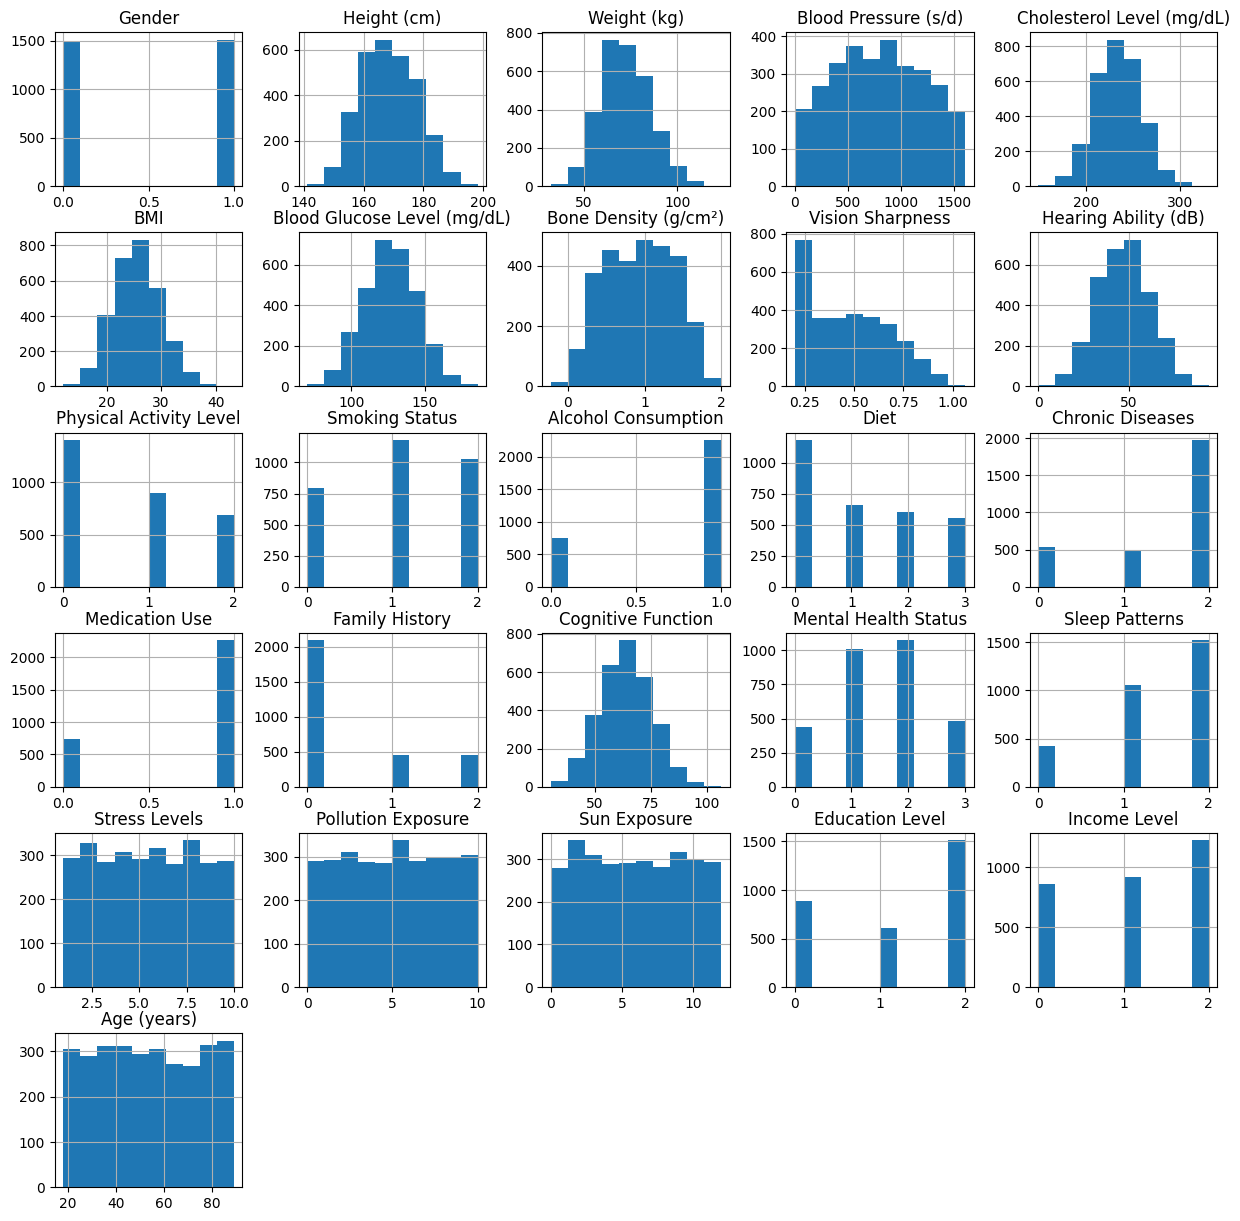

In [96]:
# data visualization

df.hist(figsize=(15,15))

In [97]:
from sklearn.model_selection import train_test_split


In [98]:
X=df.drop("Age (years)",axis=1)
y=df['Age (years)']

In [99]:
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.3,random_state=1)

In [100]:
X_test.shape

(900, 25)

In [101]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [102]:
tree_clf=DecisionTreeClassifier()
nb_clf=GaussianNB()
lr_clf=LogisticRegression()
svm_clf=SVC(kernel='rbf')

In [103]:
from sklearn.ensemble import VotingClassifier

ensemble=VotingClassifier(estimators=[('tree',tree_clf),('naive_bayes',nb_clf),('regression',lr_clf),('svm',svm_clf)],voting='hard')

In [104]:
ensemble

VotingClassifier(estimators=[('tree', DecisionTreeClassifier()),
                             ('naive_bayes', GaussianNB()),
                             ('regression', LogisticRegression()),
                             ('svm', SVC())])

In [105]:
ensemble.fit(X_train,y_train)

VotingClassifier(estimators=[('tree', DecisionTreeClassifier()),
                             ('naive_bayes', GaussianNB()),
                             ('regression', LogisticRegression()),
                             ('svm', SVC())])

In [106]:
y_pred=ensemble.predict(X_test)

In [107]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

print('confusion_matrix: ',confusion_matrix(y_test,y_pred))
print('accuracy_score: ',accuracy_score(y_test,y_pred))
print('classification_report: ',classification_report(y_test,y_pred))

confusion_matrix:  [[2 5 1 ... 0 0 0]
 [1 2 0 ... 0 0 0]
 [1 1 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 2]
 [0 0 0 ... 0 0 6]
 [0 0 0 ... 0 0 7]]
accuracy_score:  0.043333333333333335
classification_report:                precision    recall  f1-score   support

          18       0.07      0.12      0.09        16
          19       0.08      0.20      0.11        10
          20       0.00      0.00      0.00         7
          21       0.00      0.00      0.00         6
          22       0.08      0.11      0.09         9
          23       0.04      0.25      0.06        16
          24       0.25      0.07      0.11        14
          25       0.00      0.00      0.00        11
          26       0.14      0.11      0.12         9
          27       0.00      0.00      0.00        11
          28       0.01      0.18      0.03        11
          29       0.00      0.00      0.00        13
          30       0.33      0.06      0.11        16
          31       0.25      0.08      0.1

In [108]:
# regression

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor

lr_rgr=LinearRegression()
dt_rgr=DecisionTreeRegressor()
svm_rgr=SVR(kernel='rbf')
forest_rgr=RandomForestRegressor()

ensemble_regression=VotingRegressor(estimators=[('LinearRegression',lr_rgr),('DecisionTreeRegressor',dt_rgr),('forest',forest_rgr),('SVR',svm_rgr)])

In [109]:
ensemble_regression

VotingRegressor(estimators=[('LinearRegression', LinearRegression()),
                            ('DecisionTreeRegressor', DecisionTreeRegressor()),
                            ('forest', RandomForestRegressor()),
                            ('SVR', SVR())])

In [110]:
ensemble_regression.fit(X_train,y_train)

VotingRegressor(estimators=[('LinearRegression', LinearRegression()),
                            ('DecisionTreeRegressor', DecisionTreeRegressor()),
                            ('forest', RandomForestRegressor()),
                            ('SVR', SVR())])

In [111]:
y_pred=ensemble_regression.predict(X_test)

In [112]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.8996008254263359

In [113]:
models={'LinearRegression':lr_rgr,'DecisionTreeRegressor':dt_rgr,'forest':forest_rgr,'SVR':svm_rgr}

In [114]:
def func(X_train,y_train,X_test,y_test,models):
    evaluation={}
    for i in range(len(models)):
        model=list(models.values())[i]
        model.fit(X_train,y_train)
        y_pred=model.predict(X_test)
        model_score=r2_score(y_test,y_pred)
        evaluation[list(models.keys())[i]]=model_score
    return evaluation



In [115]:
func(X_train,y_train,X_test,y_test,models)

{'LinearRegression': 0.9337580005611673,
 'DecisionTreeRegressor': 0.8691149420633425,
 'forest': 0.9283096754143837,
 'SVR': 0.44783766648030376}

In [116]:
output={'LinearRegression': 0.9337580005611673,
    'DecisionTreeRegressor': 0.8622969630766029,
 'forest': 0.9274948434562347,
 'SVR': 0.44783766648030376}

In [117]:
np.mean(list(output.values()))

np.float64(0.7928468683935772)

<Axes: >

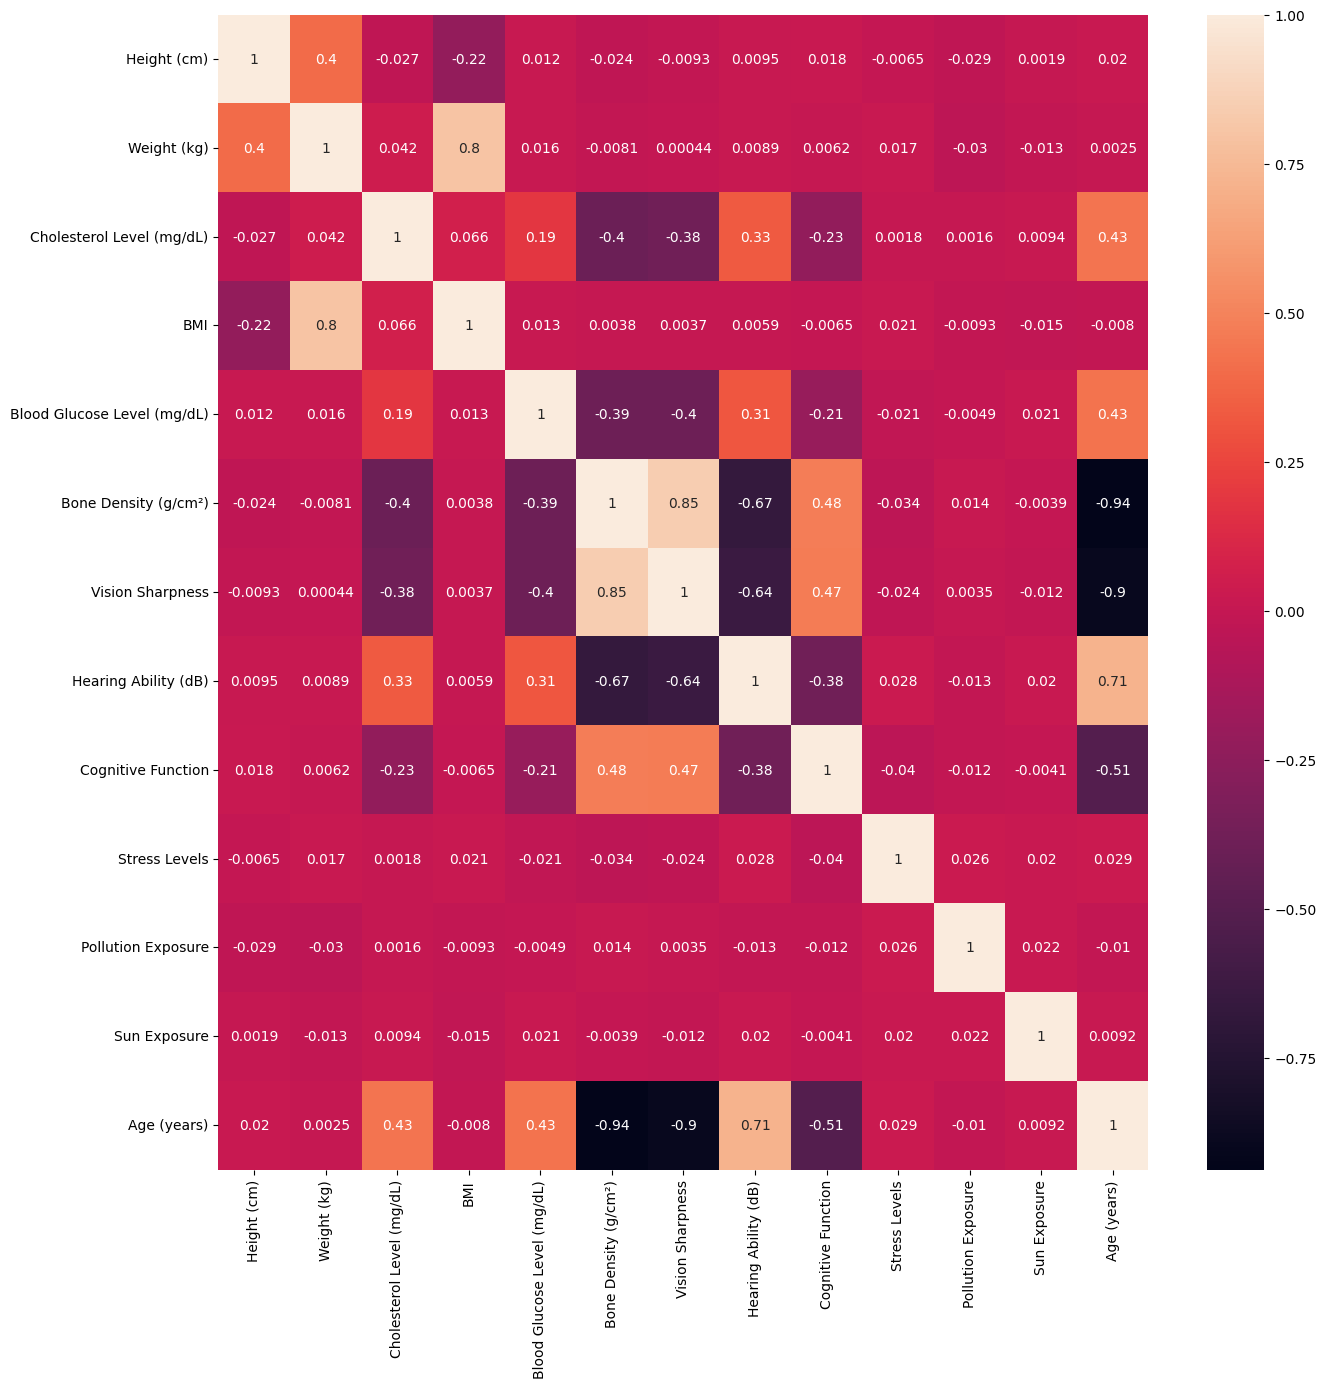

In [120]:
plt.figure(figsize=(15,15))
sns.heatmap(df[num_col].corr(),annot=True)